# Forecast Evaluations

### Classic Train/Test Split

In [49]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [50]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [52]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [53]:
df.tail()

,DATE,TRFVOLUSM227NFWA
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


In [54]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [55]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


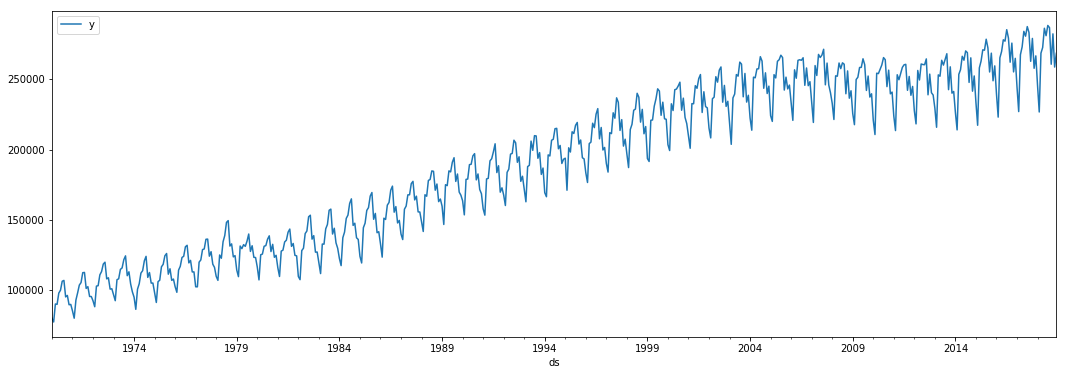

In [57]:
pd.plotting.register_matplotlib_converters()
df.plot(x='ds',y='y',figsize=(18,6))

In [58]:
len(df)

588

In [59]:
# We want to grab 12 months as test set
len(df) - 12

576

In [60]:
train = df.iloc[:576]
test = df.iloc[576:]

In [61]:
m = Prophet()
m.fit(train)
# freq='MS' as monthly data, daily data is the default in prophet
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [62]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263348.877048,273700.896538,285389.398835,263287.906476,263391.412945,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,0.0,0.0,0.0,279797.640692
584,2018-09-01,263489.606772,255922.418427,267798.746741,263396.085677,263564.541275,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,0.0,0.0,0.0,261820.114321
585,2018-10-01,263625.796827,263530.615700,274684.980550,263497.148433,263730.829393,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,0.0,0.0,0.0,268933.596004
586,2018-11-01,263766.526551,249899.532227,261199.346931,263607.920103,263913.647054,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,0.0,0.0,0.0,255559.834111
587,2018-12-01,263902.716607,251188.909587,262677.816249,263712.905145,264097.144875,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,0.0,0.0,0.0,256982.083393


**`yhat` is the prediction column**

In [63]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


[Info on ax= parameter](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)

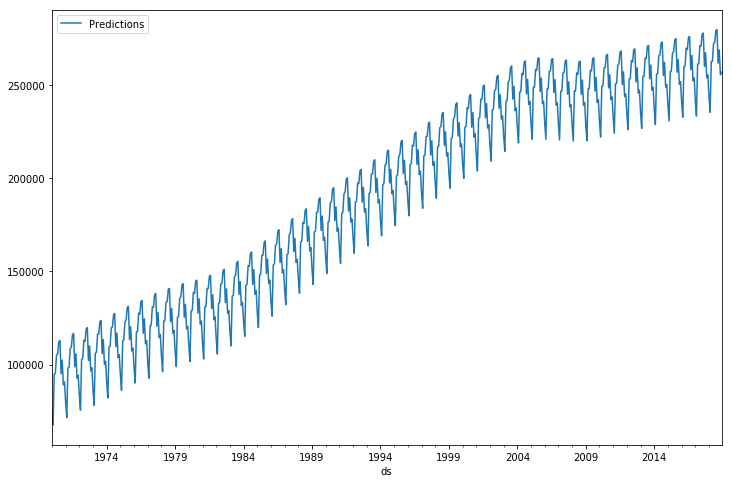

In [64]:
# prediction
forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

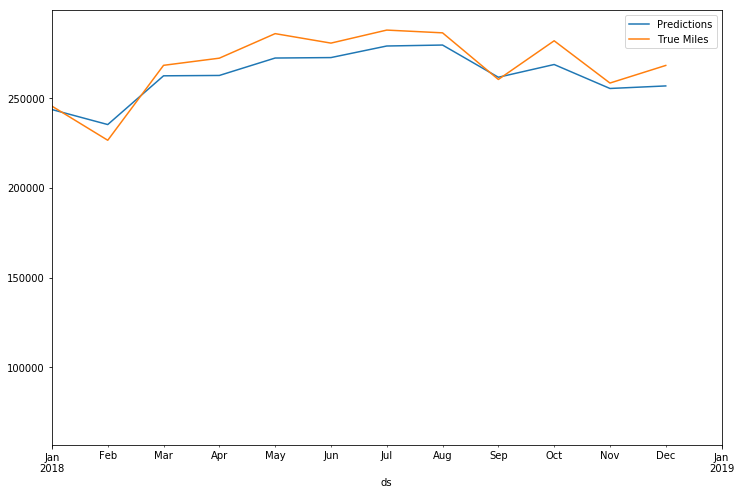

In [65]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

# by xlim we are trying to see the test set that means predicted value
test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [66]:
from statsmodels.tools.eval_measures import rmse

In [67]:
predictions = forecast.iloc[-12:]['yhat']

In [68]:
predictions

576    243796.609534
577    235426.627562
578    262627.330849
579    262828.742010
580    272552.156586
581    272803.877580
582    279261.432668
583    279797.640692
584    261820.114321
585    268933.596004
586    255559.834111
587    256982.083393
Name: yhat, dtype: float64

In [69]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [70]:
rmse(predictions,test['y'])

8661.095901709492

In [71]:
test.mean()

y    268739.666667
dtype: float64

# Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [72]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

For running the cross-validation, we need to run 3 main things in prophet


**Initial training period** <br>

**Period lenth (number of times) we want to run cross-validation for**<br>

**Horizon of prediction for each fold i.e. prediction period**<br>

In [73]:
len(df)

588

In [74]:
len(df)/12

49.0

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

In [75]:
#help(pd.Timedelta)

In [76]:
# Prophet needs data in following format
############ INITIAL ###################
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
print(initial)

############ PERIOD ###################
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
print(period)

############ HORIZON ###################
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'
print(horizon)

1825 days
1825 days
365 days


In [77]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


Making 9 forecasts because data starts from 1970 and is till 2018, that is 48 years, first 5 years is only used for training and not forecasting. So 43 years. 5 years is the period. so 43/5 = 9 (whole), that is why 9 forecasts.

In [78]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087392,107029.390158,109916.820854,102445.0,1976-12-11
1,1977-02-01,102996.111524,101609.218647,104365.444283,102416.0,1976-12-11
2,1977-03-01,118973.318121,117571.777260,120337.005028,119960.0,1976-12-11
3,1977-04-01,120612.923715,119176.115493,122036.699194,121513.0,1976-12-11
4,1977-05-01,127883.031835,126385.182250,129484.511343,128884.0,1976-12-11


In [79]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273254.523501,267206.838595,279271.617975,283184.0,2016-12-01
104,2017-09-01,255372.720203,249661.158717,260903.514498,262673.0,2016-12-01
105,2017-10-01,262476.518564,257091.278098,268000.200496,278937.0,2016-12-01
106,2017-11-01,249126.648938,243595.250150,254620.401608,257712.0,2016-12-01
107,2017-12-01,250371.688410,244675.593748,256687.330653,266535.0,2016-12-01


In [80]:
# This is raw performance metrics data
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.475016e+07,4974.953321,4574.792884,0.027989,0.023530,0.3
1,53 days,2.225769e+07,4717.805405,4310.286545,0.025251,0.023530,0.3
2,54 days,1.881510e+07,4337.637524,3795.378420,0.020424,0.022577,0.4
3,55 days,2.372965e+07,4871.309349,4310.859315,0.023444,0.023530,0.3
4,57 days,2.148966e+07,4635.693756,4041.835674,0.021690,0.022577,0.4
...,...,...,...,...,...,...,...
94,360 days,1.874147e+07,4329.141456,3781.821952,0.019661,0.019560,0.5
95,361 days,1.785800e+07,4225.872218,3505.228939,0.018281,0.018940,0.5
96,362 days,3.227921e+07,5681.479865,4434.778153,0.022095,0.024868,0.4
97,364 days,3.058393e+07,5530.273959,4279.242970,0.021519,0.021985,0.5


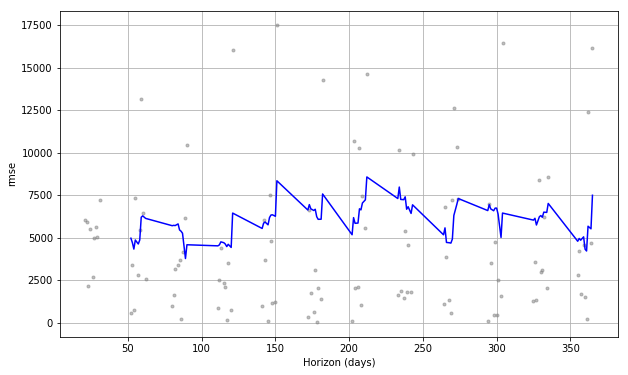

In [81]:
plot_cross_validation_metric(df_cv, metric='rmse');

#### This tells us we are good to predict around 100 days in horizon. But if try to predict beyond 150 errors start to increase

MAPE is Mean Absolute Percentage Error

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

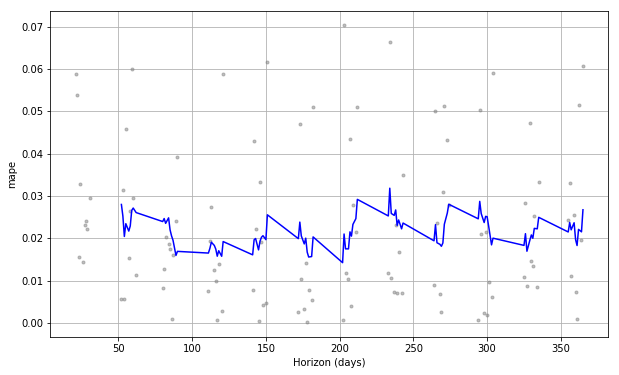

In [82]:
# Similar CV metrics for MAPR
plot_cross_validation_metric(df_cv, metric='mape');

### REFER Prophet documentation on this. This kind of CV metrics are better off to model with daily data and NOT monthly data, because we will have more datapoints (documentation uses daily points) 